In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [5]:
#Missing Values
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df = dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [8]:
df[['Region']]=df[['Region']].astype('int64')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [9]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [10]:
#Removing Missing Values
df=df.dropna().reset_index(drop=True)
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [12]:
df=df.drop(122).reset_index(drop=True)

In [13]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [15]:
#fix space in column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [17]:
#Change the data types of some columns
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [18]:
#Changing the remaining columns to appropriate data types
df[['FFMC','DMC','DC','ISI','BUI','FWI','Rain']]=df[['FFMC','DMC','DC','ISI','BUI','FWI','Rain']].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [19]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [20]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [21]:
#Lets save the cleaned dataset
df.to_csv('Algerian_forest_fires_dataset_CLEANED.csv', index=False)

## Exploratory Data Analysis

In [22]:
#Dropping date related columns as they are not needed for analysis
df_copy =df.drop(['day','month','year'],axis=1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [23]:
#Encoding of the categories in classes
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [24]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

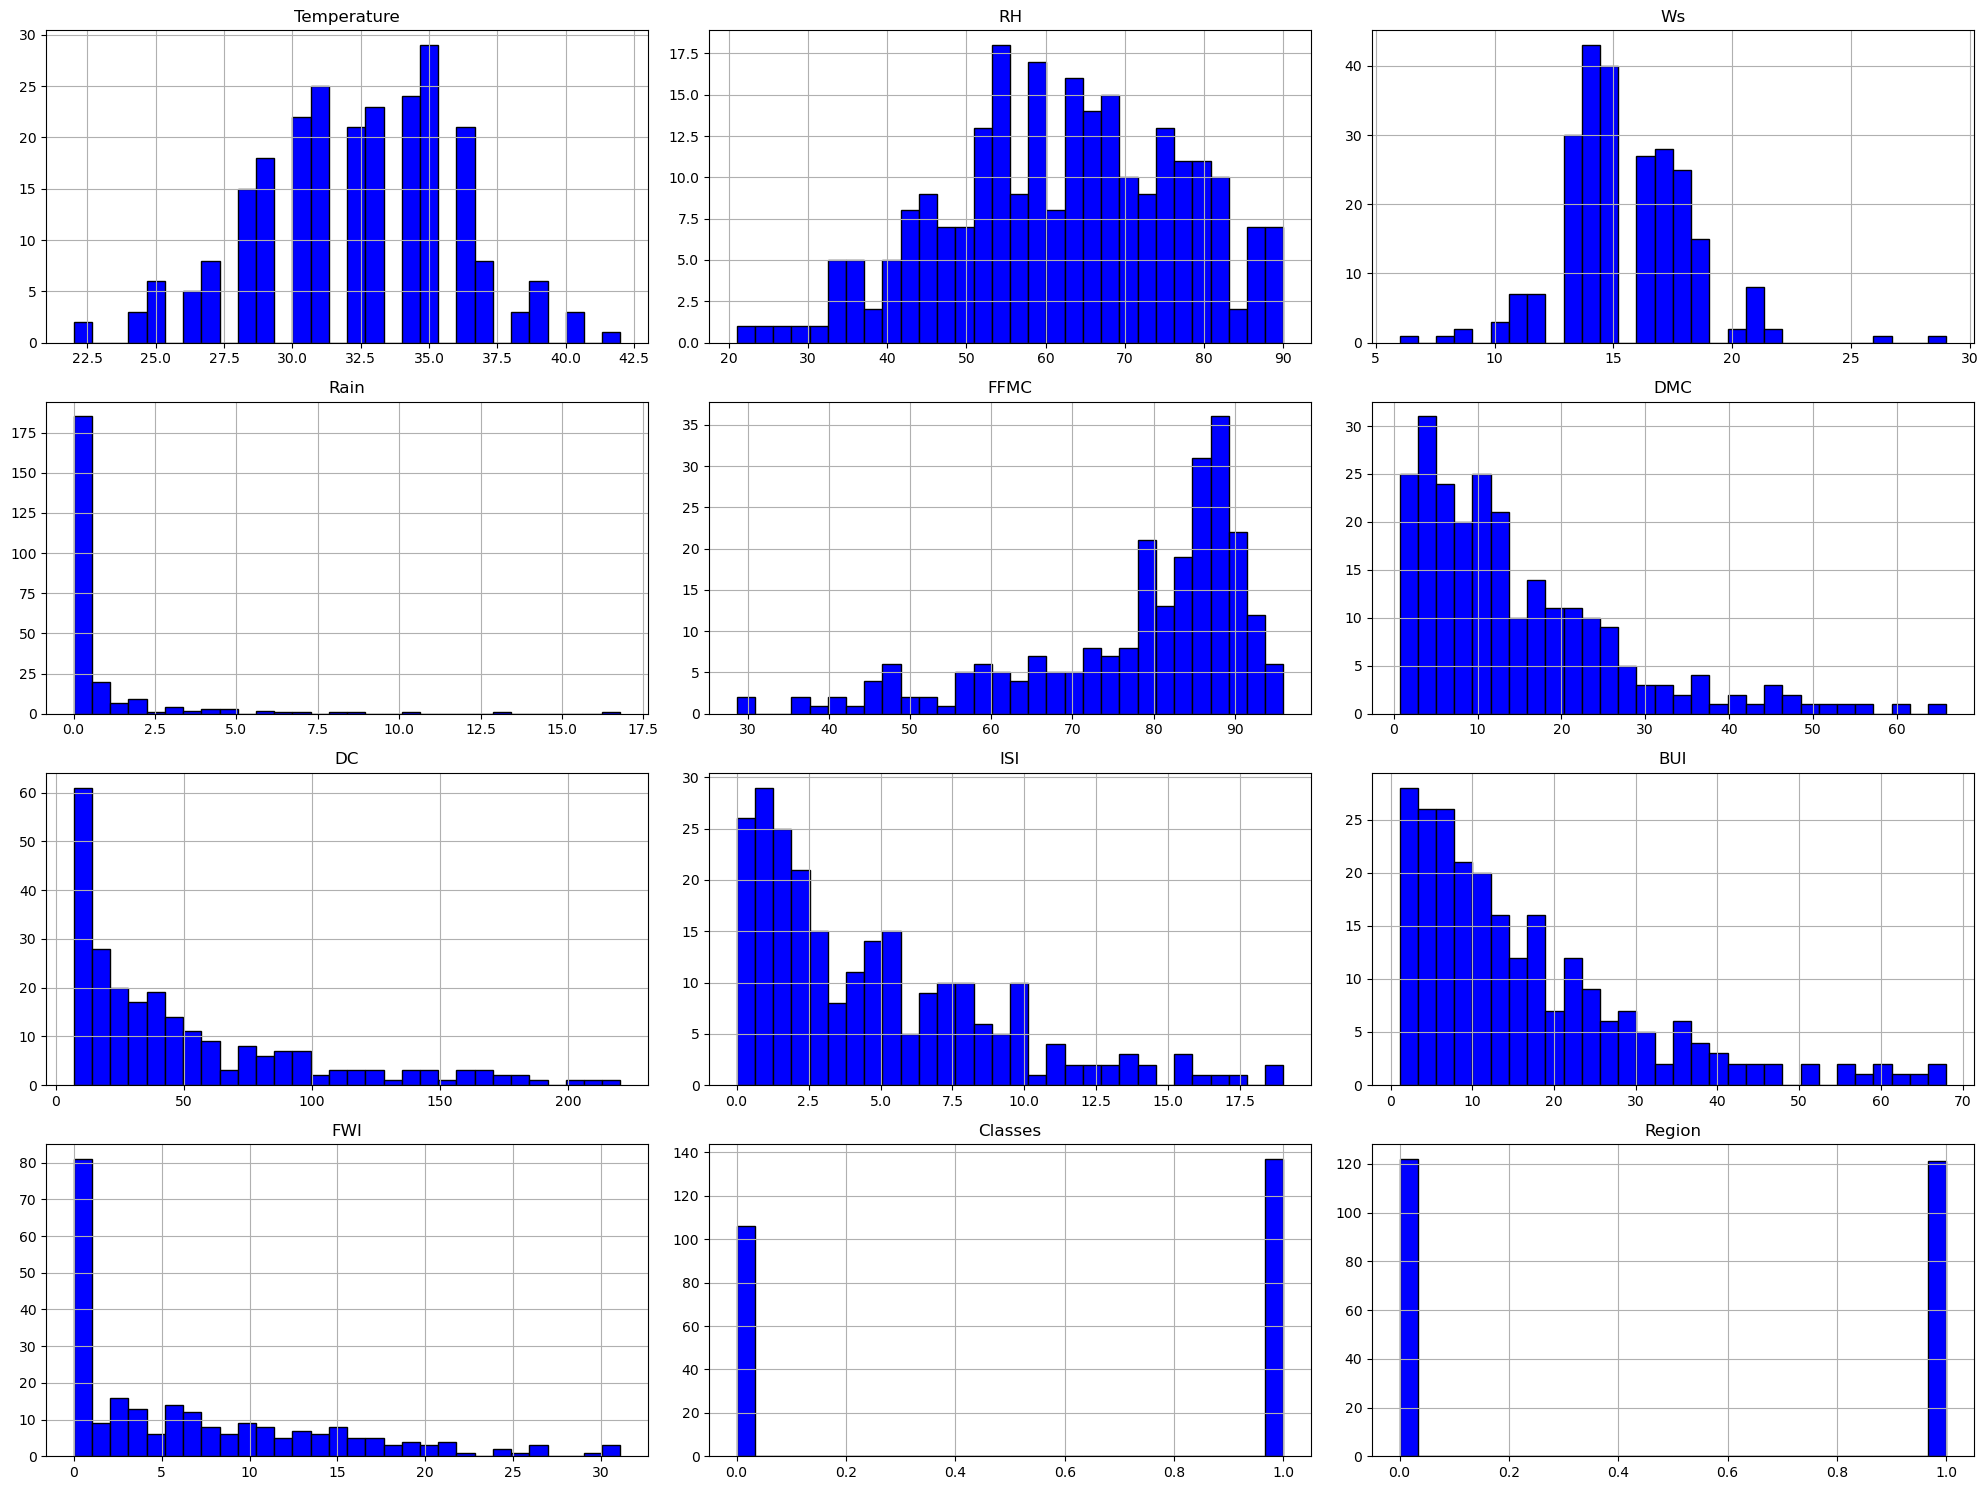

In [25]:
#Plotting density plots for all features
plt.style.use('default')
df_copy.hist(bins=30, figsize=(20,15), color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

In [26]:
#Percentage for pie chart
perc = df_copy['Classes'].value_counts(normalize=True)*100

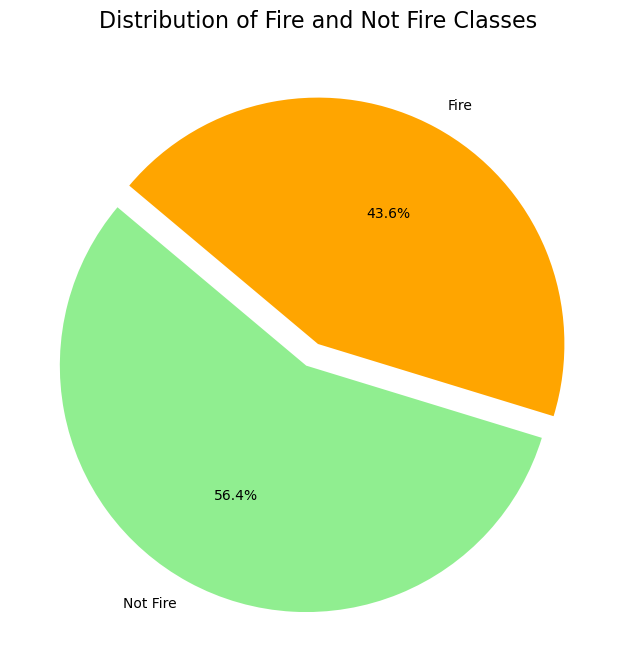

In [27]:
#Plotting pie chart
labels = ['Not Fire', 'Fire']
plt.figure(figsize=(8,8))
plt.pie(perc, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen','orange'], explode=(0.1,0))
plt.title('Distribution of Fire and Not Fire Classes', fontsize=16)
plt.show()

In [28]:
#Correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [29]:
sns.heatmap(df_copy.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)

Text(0.5, 1.0, 'Correlation Heatmap')

In [30]:
#Box plots for outlier detection
plt.figure(figsize=(20,15))
sns.boxplot(df_copy['FWI'])

<Axes: ylabel='FWI'>

In [31]:
#Monthly fire analysis
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(15,10))
sns.countplot(x='month', hue='Classes', data=dftemp, palette='Set2')
plt.title('Monthly Fire Analysis for Region 1', fontsize=16)

Text(0.5, 1.0, 'Monthly Fire Analysis for Region 1')

In [32]:
#Monthly fire analysis
dftemp = df.loc[df['Region']==0]
plt.subplots(figsize=(15,10))
sns.countplot(x='month', hue='Classes', data=dftemp, palette='Set2')
plt.title('Monthly Fire Analysis for Region 0', fontsize=16)

Text(0.5, 1.0, 'Monthly Fire Analysis for Region 0')

## Model Training


In [33]:
import warnings
warnings.filterwarnings('ignore')
df_c = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')
df_c.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [34]:
df_c.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [35]:
df_c.drop(['day', 'month', 'year'], axis=1, inplace=True)
df_c.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [36]:
df_c['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [37]:
df_c['Classes']=np.where(df_c['Classes'].str.contains('not fire'),0,1)
df_c.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [38]:
df_c['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [39]:
#Independent and Dependent Features
X = df_c.drop('FWI', axis=1)
y= df_c['FWI']

In [40]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [42]:
#Feature selection based on correlation
corr_matrix = df_c.corr()
X_train.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [43]:
#Check for multicollinearity
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap', fontsize=16)

Text(0.5, 1.0, 'Feature Correlation Heatmap')

In [62]:
# Print feature names that remain
print("Correlated features removed:", correlated_features)
print("Features kept in X_train:")
print(list(X.columns))

Correlated features removed: set()
Features kept in X_train:
['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Classes', 'Region']


In [60]:
#Drop correlated features
X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

KeyError: "['DC', 'BUI'] not found in axis"

In [64]:
X_train.shape,X_test.shape
print("\nRemaining features after correlation filtering:")
print(list(X_train.columns))


Remaining features after correlation filtering:
['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes', 'Region']


In [47]:
#Standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [49]:
#Boxplots to understand the effect of scaling
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train, orient='h', palette='Set2')
plt.title('Before Scaling', fontsize=16)
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled, orient='h', palette='Set2')
plt.title('After Scaling', fontsize=16)

Text(0.5, 1.0, 'After Scaling')

## Linear Regression Model

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {score}')
plt.scatter(y_test, y_pred)


Mean Absolute Error: 0.5468236465249978
R^2 Score: 0.9847657384266951


In [51]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
score_lasso = r2_score(y_test, y_pred_lasso)
print(f'Mean Absolute Error (Lasso): {mae_lasso}')
print(f'R^2 Score (Lasso): {score_lasso}')

Mean Absolute Error (Lasso): 0.7084773819658261
R^2 Score (Lasso): 0.9783246631008717


In [52]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error (Ridge): {mae_ridge}')
score_ridge = r2_score(y_test, y_pred_ridge)
print(f'R^2 Score (Ridge): {score_ridge}')


Mean Absolute Error (Ridge): 0.5642305340105693
R^2 Score (Ridge): 0.9842993364555513


In [53]:
#Elastic Net Regression
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)
y_pred_enet = elastic_net.predict(X_test_scaled)
mae_enet = mean_absolute_error(y_test, y_pred_enet)
print(f'Mean Absolute Error (Elastic Net): {mae_enet}')
score_enet = r2_score(y_test, y_pred_enet)
print(f'R^2 Score (Elastic Net): {score_enet}')

Mean Absolute Error (Elastic Net): 0.8291276215817327
R^2 Score (Elastic Net): 0.9745920377156688


In [54]:
#Cross Validation Lasso Regression
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled, y_train)
y_pred_lasso_cv = lasso_cv.predict(X_test_scaled)
lasso_cv.alpha_
# lasso_cv.mse_path_
mae_lasso_cv = mean_absolute_error(y_test, y_pred_lasso_cv)
score_lasso_cv = r2_score(y_test, y_pred_lasso_cv)
print(f'Mean Absolute Error (Lasso CV): {mae_lasso_cv}')
print(f'R^2 Score (Lasso CV): {score_lasso_cv}')

Mean Absolute Error (Lasso CV): 0.6199701158263431
R^2 Score (Lasso CV): 0.9820946715928275


In [55]:
from sklearn.linear_model import ElasticNetCV
elastic_net_cv = ElasticNetCV(cv=5)
elastic_net_cv.fit(X_train_scaled, y_train)
y_pred_enet_cv = elastic_net_cv.predict(X_test_scaled)
elastic_net_cv.alpha_
# elastic_net_cv.l1_ratio_
mae_enet_cv = mean_absolute_error(y_test, y_pred_enet_cv)
score_enet_cv = r2_score(y_test, y_pred_enet_cv)
print(f'Mean Absolute Error (Elastic Net CV): {mae_enet_cv}')
print(f'R^2 Score (Elastic Net CV): {score_enet_cv}')

Mean Absolute Error (Elastic Net CV): 0.6575946731430904
R^2 Score (Elastic Net CV): 0.9814217587854941


In [67]:
#Pickling the best model
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(lasso_cv, open('lasso_cv_model.pkl', 'wb'))

In [66]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), 'Flask_App'))
from export_model import export_models
export_models(lasso_cv, scaler)

✓ Scaler saved to: models\scaler.pkl
✓ Model saved to: models\lasso_cv_model.pkl

Models exported successfully!

You can now run the Flask app:
  python app.py

Then visit: http://localhost:5000
